(a) Download [allEpochsRAT200502.tab](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/ATMUIF). Note that there is a documentation file explaining what is in these files.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn.objects as so
import statsmodels.api as sm
from seaborn import axes_style

# set notebook defaults
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}
so.Plot.config.theme.update(theme_dict)

"""
dataset description
-------------------
subjectID : category
    identifies the unique subjects
coh : float
    motion coherence of the trial, between 0-1
rt : float
    response time to L/R from stimulus onset
response : int
    if response was correct (1) or error (0)
"""

cols = ["subjectID", "coh", "rt", "response"]
df = pd.read_csv("datasets/allEpochsRAT200502.csv", usecols=cols)

(b) If you condition only on 'subjectID' you'll get all the trials one rat did in its entire life. If you also condition on 'coh' (coherence), you'll get all trials with the same stimulus. The null hypothesis would be that after conditioning on both 'subjectID' and 'coh', the binomial time series (response) and the continuous-positive-valued time series (rt) should be stationary. Use whatever plots, tests, or time series analysis methods you would normally use to inspect these time series and decide they look stationary.

array([<Axes: >, <Axes: >], dtype=object)

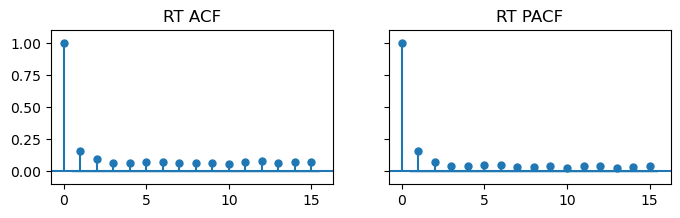

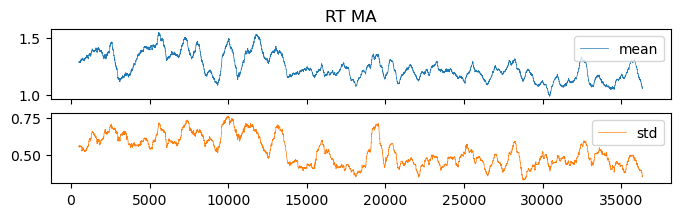

In [2]:
# 36364 trials: 29105 correct, 7259 error
df_subset = df.query("subjectID == 482 and coh == 0.65").reset_index(drop=True)

# plot the (partial) autocorrelation function
fig, axs = plt.subplots(ncols=2, figsize=(8, 2), sharey=True)
sm.graphics.tsa.plot_acf(df_subset["rt"], title="RT ACF", ax=axs[0], lags=15)
sm.graphics.tsa.plot_pacf(df_subset["rt"], title="RT PACF", ax=axs[1], lags=15)
[ax.set_ylim((-0.1, 1.1)) for ax in axs]

# plot the rolling mean and std
df_subset["rt"].rolling(window=500).agg(["mean", "std"]).plot(
    title="RT MA", subplots=True, figsize=(8, 2), linewidth=0.5
)

array([<Axes: >, <Axes: >], dtype=object)

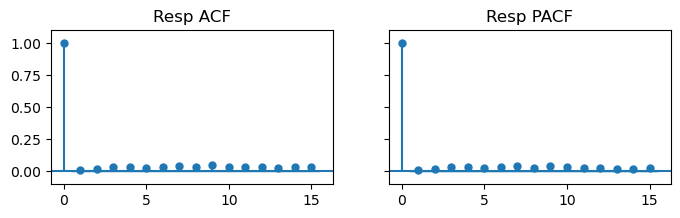

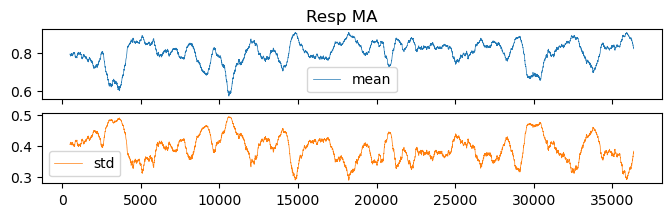

In [3]:
# plot the (partial) autocorrelation function
fig, axs = plt.subplots(ncols=2, figsize=(8, 2), sharey=True)
sm.graphics.tsa.plot_acf(df_subset["response"], title="Resp ACF", ax=axs[0], lags=15)
sm.graphics.tsa.plot_pacf(df_subset["response"], title="Resp PACF", ax=axs[1], lags=15)
[ax.set_ylim((-0.1, 1.1)) for ax in axs]

# plot the rolling mean and std
df_subset["response"].rolling(window=500).agg(["mean", "std"]).plot(
    title="Resp MA", subplots=True, figsize=(8, 2), linewidth=0.5
)

(c) Selecting data from one subject as an example, inspect how average accuracy and mean RT depend on 'coh' (pooling trials over all time), and then make some plots like Shevinsky Fig 2A-C to check if accuracy depends on RT within any given coherence, pooling over all time.

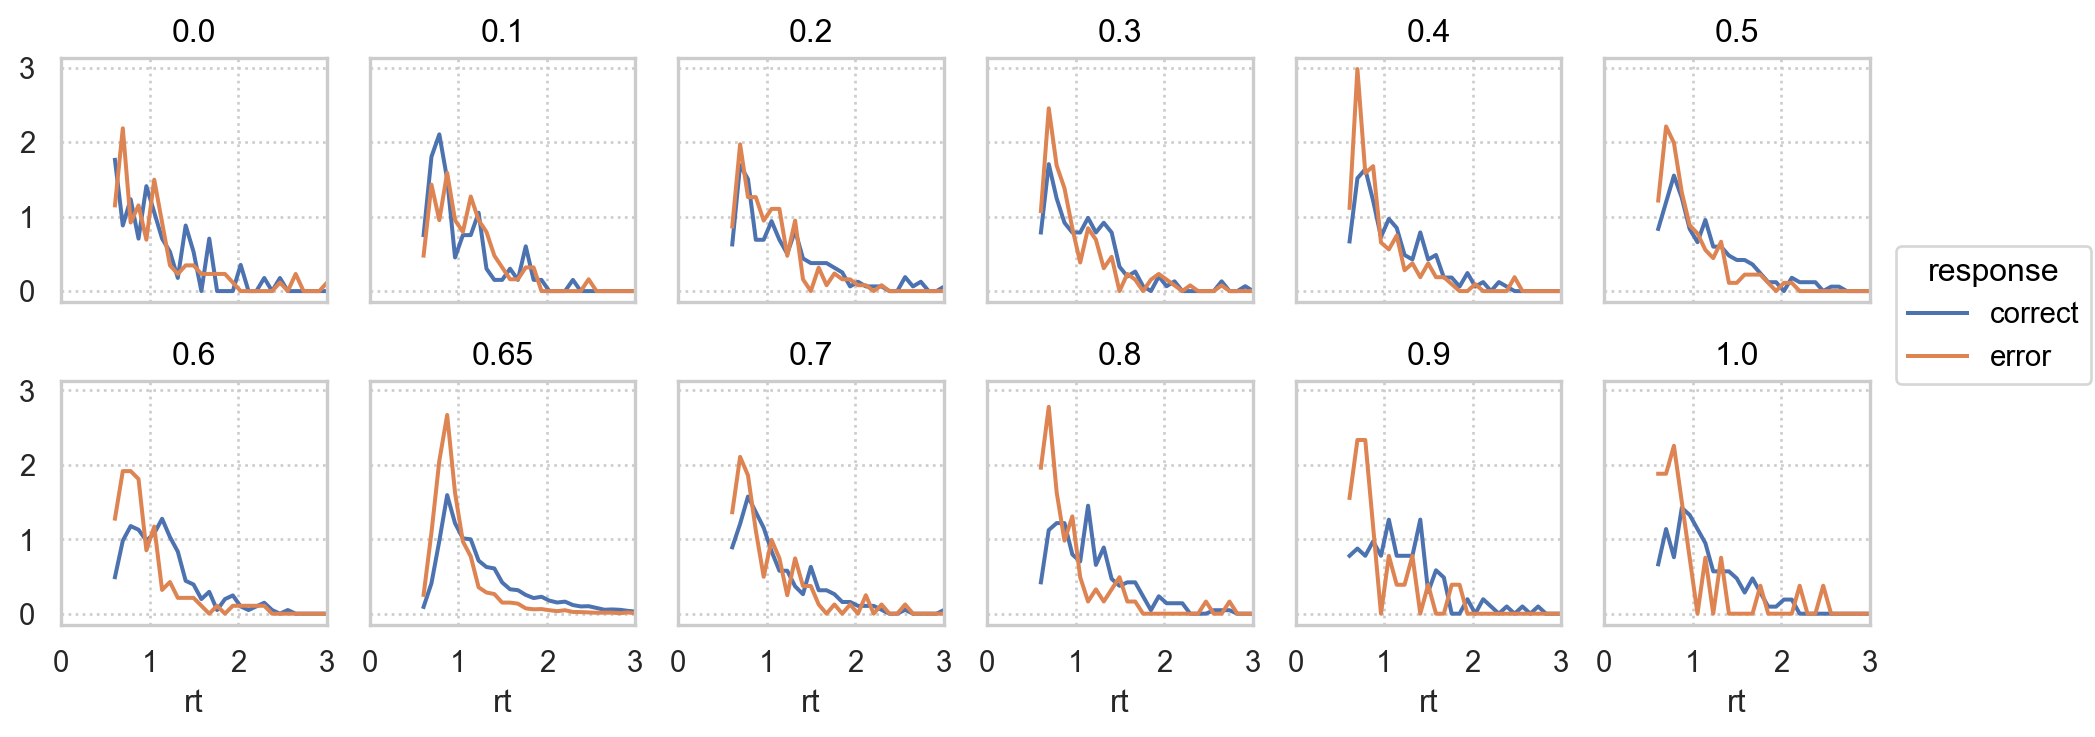

In [4]:
df_subset = df.query("subjectID == 482").assign(
    response=lambda x: x["response"].map({1: "correct", 0: "error"})
)
(
    so.Plot(df_subset, x="rt", color="response")
    .facet(col="coh", wrap=6)
    .limit(x=(0, 3))
    .add(so.Lines(), so.Hist(stat="density", bins=50))
    .layout(size=(10, 4))
)